# Another Titanic Data Analysis
*The Start of my Kaggle Machine Learning Journey*

![](https://s26162.pcdn.co/wp-content/uploads/sites/3/2021/02/titanic-feat1.jpg)

As is the case with many beginning to learn about Machine Learning,the Titanic dataset has become a staple for beginners getting started. While I have been exposed to this dataset many times, I haven't spent time with trying to put together a formal analysis and enter the Kaggle-verse. So here's to new beginnings and starting my Kaggle machine learning journey with this dataset.

## Some background

The story of the Titanic is one of tragedy. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In the challenge the following question is asked: **“what sorts of people were more likely to survive?”**

The following notebook attempts to explore answering this question and develop a model which can predict passenger survival. 

With this in mind, lets get into it!

## Some Questions

Before getting into modelling passenger survival, lets first explore the data by seeking to ask some of the following questions.

### (One-way interactions)

1. What proportion of male passengers who survived? What is the proportion of female passengers who survived?

2. Is there a relationship between ticket class and survival?

3. Is there a relationship between age and survival?

4. Is there a relationship between number of siblings / spouses aboard the Titanic and survival?

5. Is there a relationship between the number of parents / children aboard the Titanic and survival?

### (Two-way interactions) 

1. Is there an observable two-way interaction effect between passenger sex, ticket class and survival?

2. Is there a observable two-way interaction effect between passenger sex, age and survival?

3. Is there a observable two-way interaction effect between passenger sex, number of siblings / spouses aboard the Titanic and survival?

4. Is there a observable two-way interaction effect between passenger sex, number of parents / children aboard the Titanic and survival?

5. Is there a observable two-way interaction effect between passenger ticket class, age and survival?

6. Is there a observable two-way interaction effect between passenger ticket class, number of siblings / spouses aboard the Titanic and survival?

7. Is there a observable two-way interaction effect between passenger ticket class, number of parents / children aboard the Titanic and survival?

8. Is there a observable two-way interaction effect between passenger age, number of siblings / spouses aboard the Titanic and survival?

9. Is there a observable two-way interaction effect between passenger age, number of parents / children aboard the Titanic and survival?

**While it is possible to explore higher dimension interactions, since it becomes more challenging to visualize and interpret, only one and two way interactions will be considered.**

## Missing data.

Before getting into exploring these questions, I like to check for missing data. While there may not be any treatment applied to the missing data, awareness of it is important for making inference. To check for missing data the the `missingno` module can help visualize the missing data. For exact proportions, some manipulation with `pandas` will be implemented. (For more info on the `missingno` module, check out [this article on Medium](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=The%20missingno%20Library,%2C%20heatmap%2C%20or%20a%20dendrogram.)) 

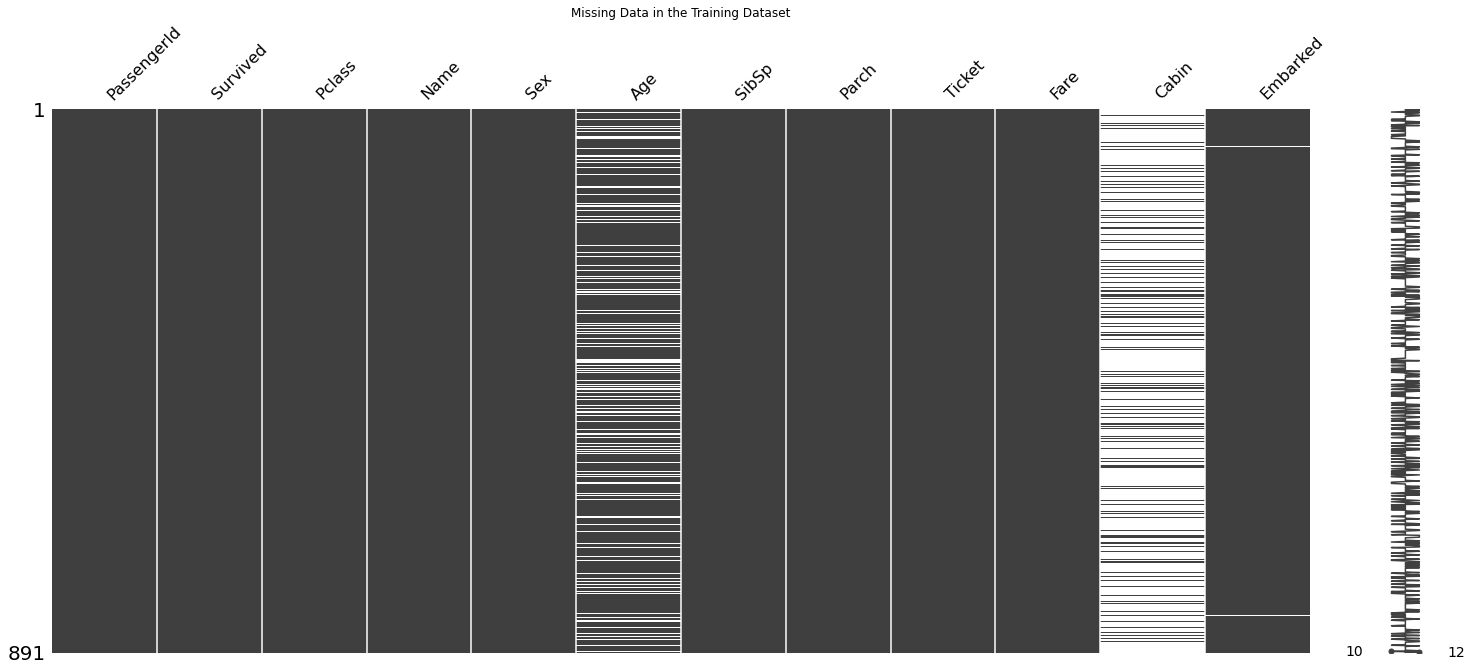

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
# Will be working with the training dataset exclusively

dt= pd.read_csv("../input/titanic/train.csv")

msno.matrix(dt)
plt.title("Missing Data in the Training Dataset")
plt.show()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
